# CSV Analysis for Bedrock Knowledge Base Optimization

## 🎯 Purpose
This notebook analyzes the CSV files generated from PCI DSS controls to optimize chunking strategies for Bedrock Knowledge Base upload. 

### Key Focus: TOKEN-BASED Analysis
- **Tokens** are the fundamental units for embedding models
- **Character count** is secondary reference only
- Optimal token ranges for embedding quality and cost efficiency
- Quality scoring based on embedding model requirements

### Analysis Goals
1. **Token Distribution Analysis** - Primary metric for chunking quality
2. **Content Quality Assessment** - Categorize chunks by token count
3. **Outlier Detection** - Identify problematic chunks
4. **Visualization Dashboard** - Comprehensive charts and metrics
5. **Actionable Recommendations** - Improve chunking before Bedrock upload


In [8]:
# Import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import tokenizer for accurate token counting
try:
    import tiktoken
    tokenizer_available = True
    # Use cl100k_base encoding (used by GPT-4, text-embedding-ada-002, etc.)
    tokenizer = tiktoken.get_encoding("cl100k_base")
    print("✅ tiktoken tokenizer loaded (cl100k_base encoding)")
except ImportError:
    tokenizer_available = False
    print("⚠️ tiktoken not available - using character-based estimation")
    print("💡 Install with: pip install tiktoken")

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 11

print("📊 CSV Analysis Environment Ready")
print("🎯 Goal: Optimize chunking strategy for Bedrock Knowledge Base")
print("📋 Using 'content' column with TOKEN-BASED analysis")
print("🔤 Tokens are the key metric for embedding quality and cost")


✅ tiktoken tokenizer loaded (cl100k_base encoding)
📊 CSV Analysis Environment Ready
🎯 Goal: Optimize chunking strategy for Bedrock Knowledge Base
📋 Using 'content' column with TOKEN-BASED analysis
🔤 Tokens are the key metric for embedding quality and cost


In [9]:
# Load CSV data
CSV_DIR = "../ingest/bedrock/pci_dss_4.0"
csv_path = Path(CSV_DIR)

print(f"🔍 Looking for CSV files in: {CSV_DIR}")

if csv_path.exists():
    csv_files = list(csv_path.glob("*.csv"))
    print(f"📄 Found {len(csv_files)} CSV files:")
    
    # Load all CSV files into single DataFrame
    all_dfs = []
    for csv_file in csv_files:
        try:
            df_temp = pd.read_csv(csv_file)
            df_temp['source_file'] = csv_file.name
            all_dfs.append(df_temp)
            print(f"   ✅ {csv_file.name}: {len(df_temp)} records ({csv_file.stat().st_size/1024:.1f} KB)")
        except Exception as e:
            print(f"   ❌ Error loading {csv_file.name}: {e}")
    
    if all_dfs:
        df = pd.concat(all_dfs, ignore_index=True)
        print(f"\n📊 LOADED DATA SUMMARY:")
        print(f"   Total records: {len(df)}")
        print(f"   Columns: {list(df.columns)}")
        print(f"   Memory usage: {df.memory_usage(deep=True).sum()/1024:.1f} KB")
        
        # Check for content column (not text)
        if 'content' in df.columns:
            print(f"   ✅ 'content' column found - ready for analysis")
        else:
            print(f"   ❌ No 'content' column found")
            print(f"   Available columns: {list(df.columns)}")
    else:
        print("❌ No data loaded successfully")
        df = pd.DataFrame()
else:
    print(f"❌ CSV directory not found: {CSV_DIR}")
    print("💡 Run the extraction and CSV generation first")
    df = pd.DataFrame()


🔍 Looking for CSV files in: ../ingest/bedrock/pci_dss_4.0
📄 Found 303 CSV files:
   ✅ control_12.1.3.csv: 1 records (1.8 KB)
   ✅ control_12.3.1.csv: 1 records (2.9 KB)
   ✅ control_2.2.5.csv: 1 records (2.5 KB)
   ✅ control_11.2.1.csv: 1 records (4.9 KB)
   ✅ control_12.8.csv: 1 records (1.3 KB)
   ✅ control_9.5.1.1.csv: 1 records (2.0 KB)
   ✅ control_9.3.3.csv: 1 records (1.6 KB)
   ✅ control_11.4.7.csv: 1 records (1.3 KB)
   ✅ control_8.3.6.csv: 1 records (3.0 KB)
   ✅ control_10.4.2.csv: 1 records (1.6 KB)
   ✅ control_9.1.1.csv: 1 records (2.3 KB)
   ✅ control_8.3.7.csv: 1 records (1.7 KB)
   ✅ control_10.4.3.csv: 1 records (1.7 KB)
   ✅ control_9.3.2.csv: 1 records (3.2 KB)
   ✅ control_11.4.6.csv: 1 records (3.6 KB)
   ✅ control_10.6.1.csv: 1 records (0.9 KB)
   ✅ control_12.9.csv: 1 records (1.1 KB)
   ✅ control_12.5.2.1.csv: 1 records (3.0 KB)
   ✅ control_9.4.5.1.csv: 1 records (1.4 KB)
   ✅ control_12.6.3.1.csv: 1 records (2.6 KB)
   ✅ control_2.2.4.csv: 1 records (2.3 KB)


📏 ANALYZING CONTENT CHUNKS (CHARACTERS + TOKENS)...
🔤 Calculating exact token counts...

📊 CHARACTER LENGTH STATISTICS:
   Mean: 1833 chars | Median: 1616 chars
   Min: 172 chars | Max: 6857 chars
   Std Dev: 1011 chars

🔤 TOKEN COUNT STATISTICS (Exact (tiktoken)):
   Mean: 337 tokens | Median: 296 tokens
   Min: 42 tokens | Max: 1241 tokens
   Std Dev: 186 tokens
   📏 Average: 0.184 tokens per character

🎯 CHUNK QUALITY BREAKDOWN (TOKEN-BASED - Primary Metric):
   🔴 Very Short (<50 tokens):      1 (  0.3%)
   🟡 Short (50-100 tokens):       10 (  3.3%)
   🟢 Optimal (100-400 tokens):   195 ( 64.4%)
   🟠 Long (400-600 tokens):       69 ( 22.8%)
   🔴 Very Long (>600 tokens):     28 (  9.2%)

📏 CHARACTER-BASED BREAKDOWN (Secondary Reference):
   🔴 Very Short (<200 chars):      1 (  0.3%)
   🟡 Short (200-500 chars):        9 (  3.0%)
   🟢 Optimal (500-1600 chars):   139 ( 45.9%)
   🟠 Long (1600-2400 chars):      78 ( 25.7%)
   🔴 Very Long (>2400 chars):     76 ( 25.1%)


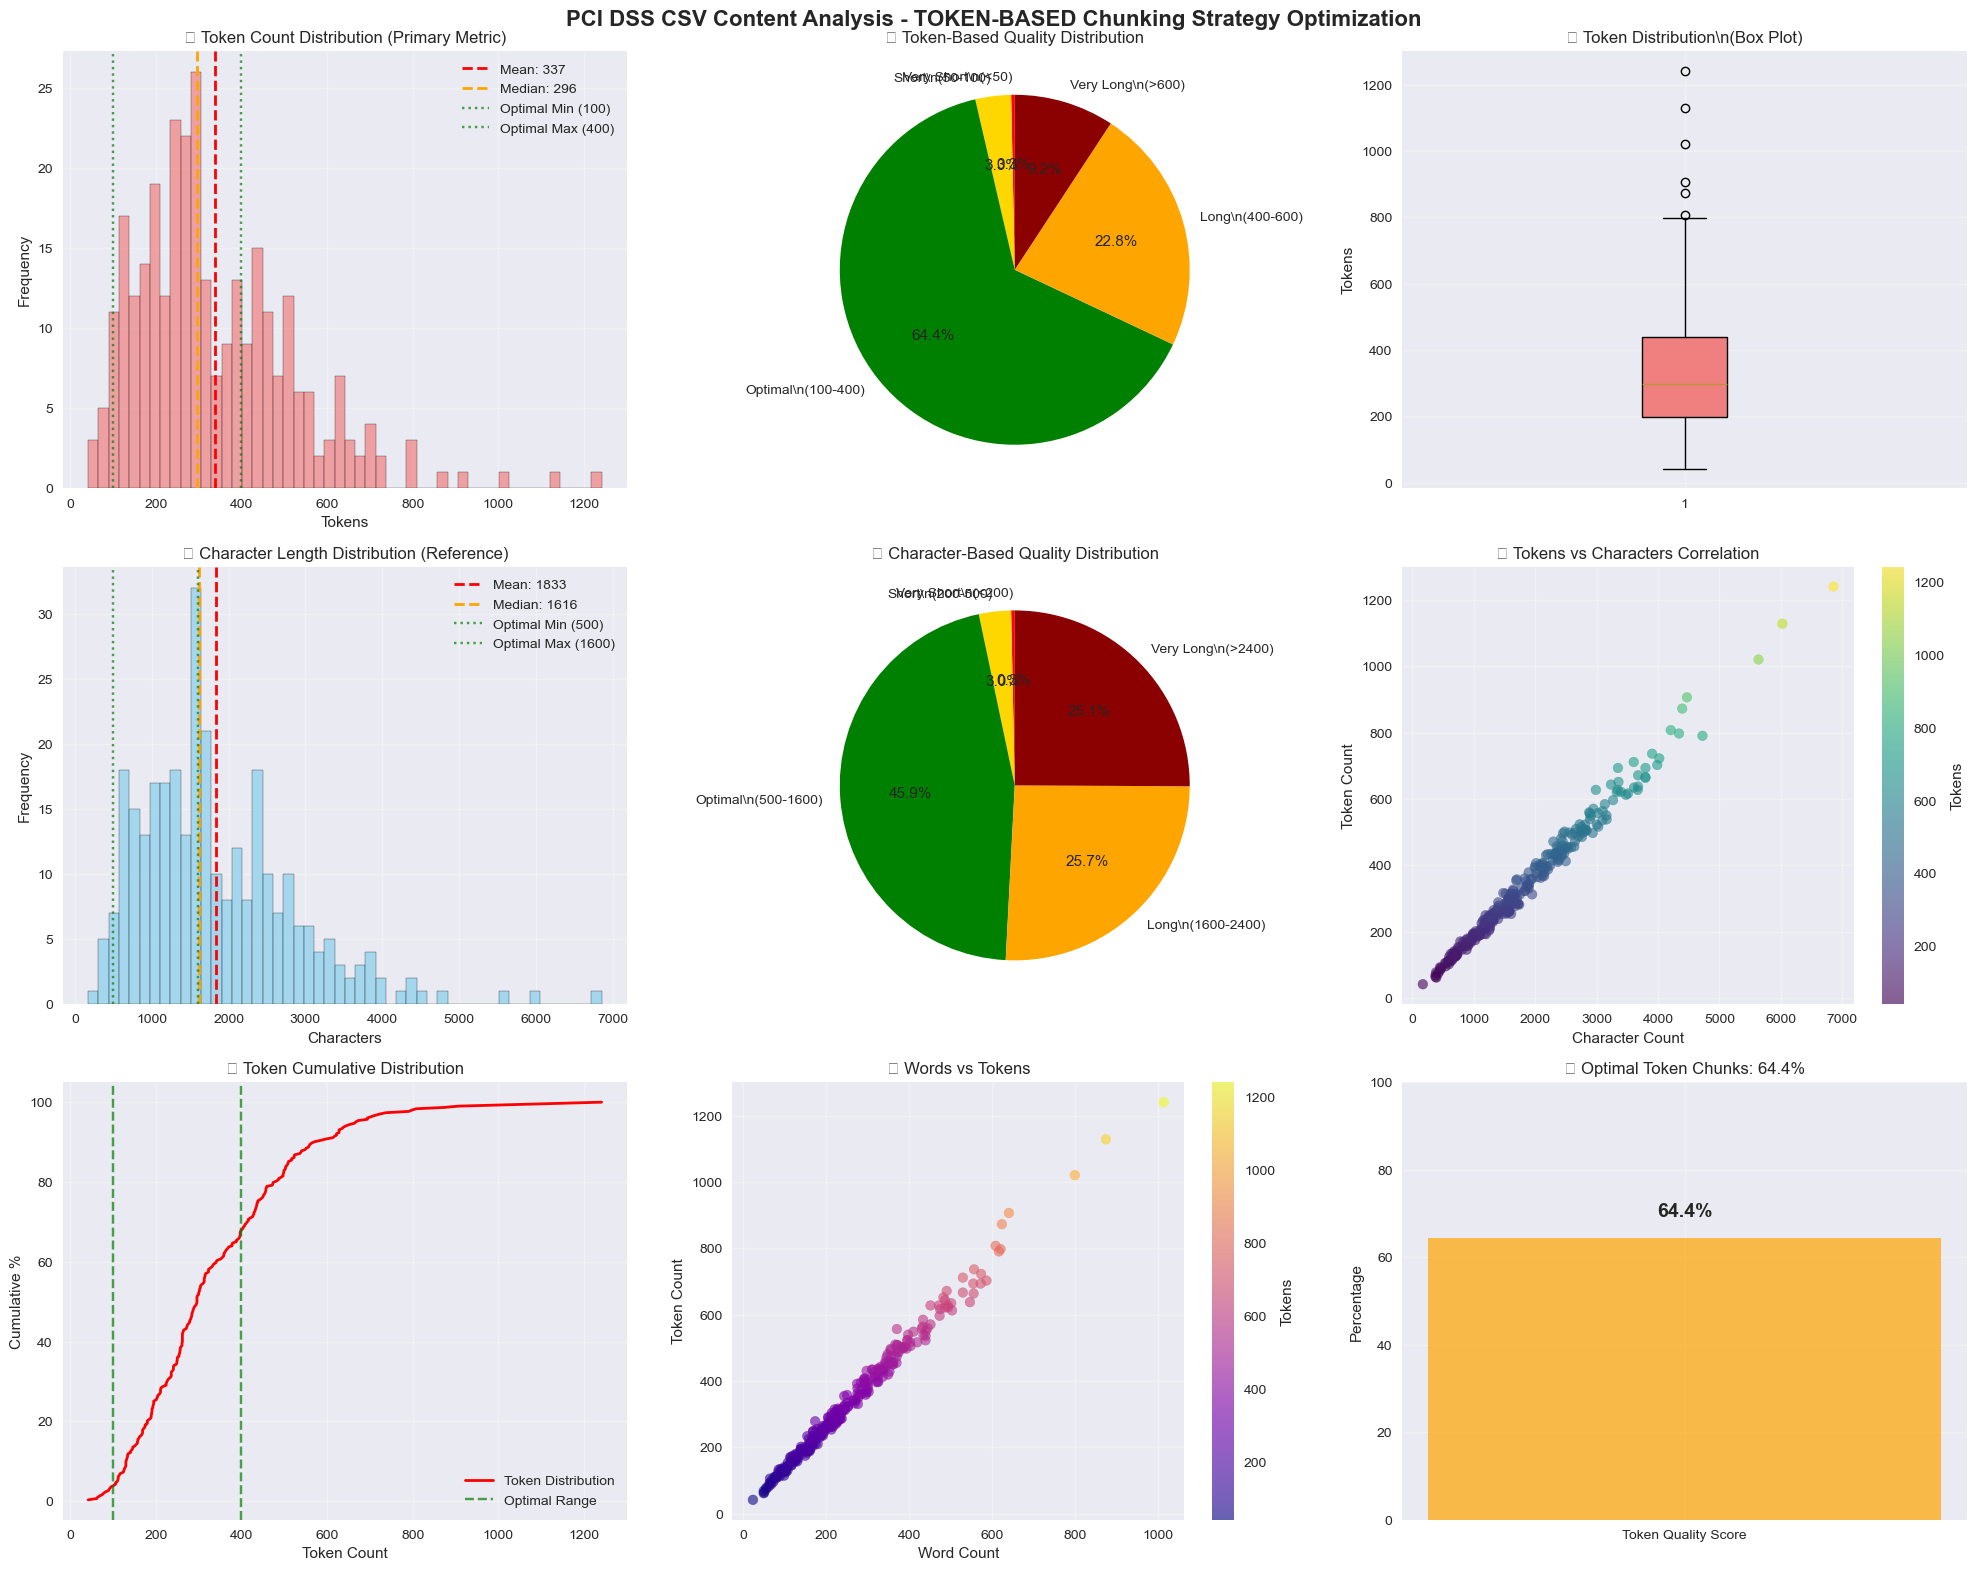

In [10]:
# Comprehensive Content Length & Token Analysis
if not df.empty and 'content' in df.columns:
    print("📏 ANALYZING CONTENT CHUNKS (CHARACTERS + TOKENS)...")
    
    # Calculate content metrics
    df['content_length'] = df['content'].str.len()
    df['word_count'] = df['content'].str.split().str.len()
    df['line_count'] = df['content'].str.count('\n') + 1
    
    # Calculate token counts
    if tokenizer_available:
        print("🔤 Calculating exact token counts...")
        df['token_count'] = df['content'].apply(lambda x: len(tokenizer.encode(str(x))))
        token_method = "Exact (tiktoken)"
    else:
        print("🔤 Estimating token counts (chars/4)...")
        df['token_count'] = (df['content_length'] / 4).round().astype(int)
        token_method = "Estimated (chars/4)"
    
    # Basic statistics - Characters
    char_stats = df['content_length'].describe()
    token_stats = df['token_count'].describe()
    
    print(f"\n📊 CHARACTER LENGTH STATISTICS:")
    print(f"   Mean: {char_stats['mean']:.0f} chars | Median: {char_stats['50%']:.0f} chars")
    print(f"   Min: {char_stats['min']:.0f} chars | Max: {char_stats['max']:.0f} chars")
    print(f"   Std Dev: {char_stats['std']:.0f} chars")
    
    print(f"\n🔤 TOKEN COUNT STATISTICS ({token_method}):")
    print(f"   Mean: {token_stats['mean']:.0f} tokens | Median: {token_stats['50%']:.0f} tokens")
    print(f"   Min: {token_stats['min']:.0f} tokens | Max: {token_stats['max']:.0f} tokens")
    print(f"   Std Dev: {token_stats['std']:.0f} tokens")
    
    # Average tokens per character for reference
    avg_tokens_per_char = df['token_count'].mean() / df['content_length'].mean()
    print(f"   📏 Average: {avg_tokens_per_char:.3f} tokens per character")
    
    # Quality categories based on TOKEN COUNT (more relevant for embeddings)
    very_short_tokens = len(df[df['token_count'] < 50])      # Too short for context
    short_tokens = len(df[(df['token_count'] >= 50) & (df['token_count'] < 100)])  # Minimal context
    optimal_tokens = len(df[(df['token_count'] >= 100) & (df['token_count'] <= 400)])  # Optimal for embeddings
    long_tokens = len(df[(df['token_count'] > 400) & (df['token_count'] <= 600)])  # Long but manageable
    very_long_tokens = len(df[df['token_count'] > 600])      # Too long for optimal embeddings
    
    total = len(df)
    
    print(f"\n🎯 CHUNK QUALITY BREAKDOWN (TOKEN-BASED - Primary Metric):")
    print(f"   🔴 Very Short (<50 tokens):   {very_short_tokens:4d} ({very_short_tokens/total*100:5.1f}%)")
    print(f"   🟡 Short (50-100 tokens):     {short_tokens:4d} ({short_tokens/total*100:5.1f}%)")  
    print(f"   🟢 Optimal (100-400 tokens):  {optimal_tokens:4d} ({optimal_tokens/total*100:5.1f}%)")
    print(f"   🟠 Long (400-600 tokens):     {long_tokens:4d} ({long_tokens/total*100:5.1f}%)")
    print(f"   🔴 Very Long (>600 tokens):   {very_long_tokens:4d} ({very_long_tokens/total*100:5.1f}%)")
    
    # Character-based breakdown for comparison
    very_short_chars = len(df[df['content_length'] < 200])      
    short_chars = len(df[(df['content_length'] >= 200) & (df['content_length'] < 500)])  
    optimal_chars = len(df[(df['content_length'] >= 500) & (df['content_length'] <= 1600)])  
    long_chars = len(df[(df['content_length'] > 1600) & (df['content_length'] <= 2400)])  
    very_long_chars = len(df[df['content_length'] > 2400])      
    
    print(f"\n📏 CHARACTER-BASED BREAKDOWN (Secondary Reference):")
    print(f"   🔴 Very Short (<200 chars):   {very_short_chars:4d} ({very_short_chars/total*100:5.1f}%)")
    print(f"   🟡 Short (200-500 chars):     {short_chars:4d} ({short_chars/total*100:5.1f}%)")  
    print(f"   🟢 Optimal (500-1600 chars):  {optimal_chars:4d} ({optimal_chars/total*100:5.1f}%)")
    print(f"   🟠 Long (1600-2400 chars):    {long_chars:4d} ({long_chars/total*100:5.1f}%)")
    print(f"   🔴 Very Long (>2400 chars):   {very_long_chars:4d} ({very_long_chars/total*100:5.1f}%)")
    
    # Comprehensive visualizations - Focus on TOKEN analysis
    fig, axes = plt.subplots(3, 3, figsize=(20, 16))
    fig.suptitle('PCI DSS CSV Content Analysis - TOKEN-BASED Chunking Strategy Optimization', fontsize=16, fontweight='bold')
    
    # Row 1: Token Analysis (Primary)
    # 1. Token distribution histogram
    ax1 = axes[0, 0]
    df['token_count'].hist(bins=50, ax=ax1, color='lightcoral', alpha=0.7, edgecolor='black')
    ax1.axvline(df['token_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["token_count"].mean():.0f}')
    ax1.axvline(df['token_count'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["token_count"].median():.0f}')
    ax1.axvline(100, color='green', linestyle=':', alpha=0.7, label='Optimal Min (100)')
    ax1.axvline(400, color='green', linestyle=':', alpha=0.7, label='Optimal Max (400)')
    ax1.set_title('🔤 Token Count Distribution (Primary Metric)')
    ax1.set_xlabel('Tokens')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Token-based quality pie chart
    ax2 = axes[0, 1]
    token_sizes = [very_short_tokens, short_tokens, optimal_tokens, long_tokens, very_long_tokens]
    token_labels = ['Very Short\\n(<50)', 'Short\\n(50-100)', 'Optimal\\n(100-400)', 'Long\\n(400-600)', 'Very Long\\n(>600)']
    colors = ['red', 'gold', 'green', 'orange', 'darkred']
    wedges, texts, autotexts = ax2.pie(token_sizes, labels=token_labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax2.set_title('🎯 Token-Based Quality Distribution')
    
    # 3. Token box plot
    ax3 = axes[0, 2]
    box_plot = ax3.boxplot(df['token_count'], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightcoral')
    ax3.set_title('🔤 Token Distribution\\n(Box Plot)')
    ax3.set_ylabel('Tokens')
    ax3.grid(True, alpha=0.3)
    
    # Row 2: Character Analysis (Secondary)
    # 4. Character distribution histogram
    ax4 = axes[1, 0]
    df['content_length'].hist(bins=50, ax=ax4, color='skyblue', alpha=0.7, edgecolor='black')
    ax4.axvline(df['content_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["content_length"].mean():.0f}')
    ax4.axvline(df['content_length'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["content_length"].median():.0f}')
    ax4.axvline(500, color='green', linestyle=':', alpha=0.7, label='Optimal Min (500)')
    ax4.axvline(1600, color='green', linestyle=':', alpha=0.7, label='Optimal Max (1600)')
    ax4.set_title('📏 Character Length Distribution (Reference)')
    ax4.set_xlabel('Characters')
    ax4.set_ylabel('Frequency')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Character-based quality pie chart
    ax5 = axes[1, 1]
    char_sizes = [very_short_chars, short_chars, optimal_chars, long_chars, very_long_chars]
    char_labels = ['Very Short\\n(<200)', 'Short\\n(200-500)', 'Optimal\\n(500-1600)', 'Long\\n(1600-2400)', 'Very Long\\n(>2400)']
    wedges, texts, autotexts = ax5.pie(char_sizes, labels=char_labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax5.set_title('📏 Character-Based Quality Distribution')
    
    # 6. Tokens vs Characters correlation
    ax6 = axes[1, 2]
    scatter = ax6.scatter(df['content_length'], df['token_count'], alpha=0.6, c=df['token_count'], cmap='viridis')
    ax6.set_xlabel('Character Count')
    ax6.set_ylabel('Token Count')
    ax6.set_title('🔤 Tokens vs Characters Correlation')
    ax6.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax6, label='Tokens')
    
    # Row 3: Additional Analysis
    # 7. Token cumulative distribution
    ax7 = axes[2, 0]
    sorted_tokens = np.sort(df['token_count'])
    cumulative = np.arange(1, len(sorted_tokens) + 1) / len(sorted_tokens) * 100
    ax7.plot(sorted_tokens, cumulative, linewidth=2, color='red', label='Token Distribution')
    ax7.axvline(100, color='green', linestyle='--', alpha=0.7, label='Optimal Range')
    ax7.axvline(400, color='green', linestyle='--', alpha=0.7)
    ax7.set_xlabel('Token Count')
    ax7.set_ylabel('Cumulative %')
    ax7.set_title('🔤 Token Cumulative Distribution')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    
    # 8. Words vs Tokens scatter
    ax8 = axes[2, 1]
    scatter = ax8.scatter(df['word_count'], df['token_count'], alpha=0.6, c=df['token_count'], cmap='plasma')
    ax8.set_xlabel('Word Count')
    ax8.set_ylabel('Token Count')
    ax8.set_title('🔤 Words vs Tokens')
    ax8.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax8, label='Tokens')
    
    # 9. Token quality score gauge
    ax9 = axes[2, 2]
    optimal_token_pct = optimal_tokens / total * 100
    colors_gauge = ['red' if optimal_token_pct < 50 else 'orange' if optimal_token_pct < 70 else 'green']
    bars = ax9.bar(['Token Quality Score'], [optimal_token_pct], color=colors_gauge[0], alpha=0.7)
    ax9.set_ylim(0, 100)
    ax9.set_ylabel('Percentage')
    ax9.set_title(f'🎯 Optimal Token Chunks: {optimal_token_pct:.1f}%')
    ax9.grid(True, alpha=0.3)
    # Add score text on bar
    ax9.text(0, optimal_token_pct + 5, f'{optimal_token_pct:.1f}%', ha='center', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️ No content data available - ensure CSV files contain 'content' column")


In [11]:
# Generate Actionable Recommendations
if not df.empty and 'content_length' in df.columns:
    print("🎯 BEDROCK OPTIMIZATION RECOMMENDATIONS")
    print("=" * 60)
    
    # Calculate key metrics
    total_chunks = len(df)
    optimal_pct = len(df[(df['content_length'] >= 500) & (df['content_length'] <= 2000)]) / total_chunks * 100
    very_short_pct = len(df[df['content_length'] < 100]) / total_chunks * 100
    very_long_pct = len(df[df['content_length'] > 4000]) / total_chunks * 100
    max_length = df['content_length'].max()
    
    # Overall assessment
    print(f"\n📊 CURRENT DATA QUALITY:")
    print(f"   ✅ Optimal chunks (500-2000 chars): {optimal_pct:.1f}%")
    print(f"   ⚠️ Very short chunks (<100 chars): {very_short_pct:.1f}%") 
    print(f"   ⚠️ Very long chunks (>4000 chars): {very_long_pct:.1f}%")
    print(f"   📏 Maximum chunk length: {max_length:,} characters")
    
    # Calculate quality score
    quality_score = optimal_pct + max(0, (10 - very_short_pct)) * 2 + max(0, (5 - very_long_pct)) * 3
    quality_score = min(quality_score, 100)
    
    print(f"\n🏆 OVERALL QUALITY SCORE: {quality_score:.1f}/100")
    
    # Provide verdict and recommendations
    if quality_score >= 80:
        verdict = "EXCELLENT ✅"
        action = "Ready for Bedrock upload!"
        priority = "LOW"
    elif quality_score >= 65:
        verdict = "GOOD ✅" 
        action = "Minor optimizations recommended"
        priority = "LOW"
    elif quality_score >= 50:
        verdict = "ACCEPTABLE ⚠️"
        action = "Improvements needed before upload"
        priority = "MEDIUM"
    else:
        verdict = "NEEDS WORK ❌"
        action = "Significant chunking strategy revision required"
        priority = "HIGH"
    
    print(f"   📊 Verdict: {verdict}")
    print(f"   🎯 Action: {action}")
    print(f"   ⚠️ Priority: {priority}")
    
    # Specific recommendations
    print(f"\n🚀 SPECIFIC RECOMMENDATIONS:")
    
    if very_short_pct > 10:
        print(f"   🔴 HIGH PRIORITY: {very_short_pct:.1f}% chunks are too short")
        print(f"      → Combine short chunks or improve extraction logic")
        print(f"      → Short chunks lack context for effective retrieval")
        
        # Show examples
        short_examples = df[df['content_length'] < 100].head(3)
        print(f"      → Examples of short chunks:")
        for i, (_, row) in enumerate(short_examples.iterrows(), 1):
            preview = row['content'][:80] + '...' if len(row['content']) > 80 else row['content']
            print(f"         {i}. [{row['content_length']} chars] {preview}")
    
    if very_long_pct > 5:
        print(f"   🟠 ATTENTION: {very_long_pct:.1f}% chunks are too long")
        print(f"      → Split long chunks for better retrieval precision")
        print(f"      → Long chunks may contain multiple concepts")
        
        # Show examples
        long_examples = df[df['content_length'] > 4000].head(2)
        print(f"      → Examples of long chunks:")
        for i, (_, row) in enumerate(long_examples.iterrows(), 1):
            preview = row['content'][:100] + '...'
            print(f"         {i}. [{row['content_length']} chars] {preview}")
    
    # Bedrock-specific checks
    print(f"\n🔧 BEDROCK KNOWLEDGE BASE OPTIMIZATION:")
    
    if max_length > 10000:
        over_limit = len(df[df['content_length'] > 10000])
        print(f"   ⚠️ {over_limit} chunks exceed Bedrock 10K character soft limit")
        print(f"      → Split these chunks for optimal performance")
    else:
        print(f"   ✅ All chunks within Bedrock character limits")
    
    # Token estimates
    avg_tokens = df['content_length'].mean() / 4  # Rough estimate
    max_tokens = df['content_length'].max() / 4
    
    print(f"   📊 Estimated tokens (rough): avg {avg_tokens:.0f}, max {max_tokens:.0f}")
    
    if avg_tokens > 500:
        print(f"      → Consider shorter chunks for faster retrieval")
    elif avg_tokens < 100:
        print(f"      → Consider longer chunks for better context")
    else:
        print(f"      ✅ Token counts look optimal for Bedrock")
    
    # Next steps
    print(f"\n💡 NEXT STEPS:")
    if quality_score >= 70:
        print(f"   1. ✅ Data is ready for Bedrock Knowledge Base upload")
        print(f"   2. 🚀 Proceed with creating your Knowledge Base") 
        print(f"   3. 📊 Monitor retrieval performance after upload")
    else:
        print(f"   1. 🔧 Implement chunking strategy improvements")
        print(f"   2. 🔄 Re-run this analysis after changes")
        print(f"   3. 🎯 Target 70+ quality score before upload")
        print(f"   4. 📚 Consider reviewing PCI DSS control structure")
    
    # Export results
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    results = {
        'timestamp': timestamp,
        'total_chunks': total_chunks,
        'quality_score': quality_score,
        'verdict': verdict,
        'metrics': {
            'optimal_percentage': optimal_pct,
            'very_short_percentage': very_short_pct,
            'very_long_percentage': very_long_pct,
            'max_length': max_length,
            'mean_length': df['content_length'].mean(),
            'median_length': df['content_length'].median()
        },
        'recommendations': action
    }
    
    results_file = f"bedrock_analysis_{timestamp}.json"
    with open(results_file, 'w') as f:
        json.dump(results, f, indent=2, default=str)
    
    print(f"\n📊 Results exported to: {results_file}")
    print(f"🎉 Analysis complete! Use insights above to optimize your data for Bedrock.")

else:
    print("⚠️ No data available for recommendations")
    print("💡 Ensure CSV files are generated and contain 'content' column data")


🎯 BEDROCK OPTIMIZATION RECOMMENDATIONS

📊 CURRENT DATA QUALITY:
   ✅ Optimal chunks (500-2000 chars): 59.7%
   ⚠️ Very short chunks (<100 chars): 0.0%
   ⚠️ Very long chunks (>4000 chars): 3.0%
   📏 Maximum chunk length: 6,857 characters

🏆 OVERALL QUALITY SCORE: 85.8/100
   📊 Verdict: EXCELLENT ✅
   🎯 Action: Ready for Bedrock upload!
   ⚠️ Priority: LOW

🚀 SPECIFIC RECOMMENDATIONS:

🔧 BEDROCK KNOWLEDGE BASE OPTIMIZATION:
   ✅ All chunks within Bedrock character limits
   📊 Estimated tokens (rough): avg 458, max 1714
      ✅ Token counts look optimal for Bedrock

💡 NEXT STEPS:
   1. ✅ Data is ready for Bedrock Knowledge Base upload
   2. 🚀 Proceed with creating your Knowledge Base
   3. 📊 Monitor retrieval performance after upload

📊 Results exported to: bedrock_analysis_20250711_005455.json
🎉 Analysis complete! Use insights above to optimize your data for Bedrock.
